<a href="https://colab.research.google.com/github/abayro125/MAT494/blob/main/3_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**3.7 Neural Networks**

A collection of connection layers of units or nodes to loosely model the neurons in the biological brain. 

3.7.1 Mathematical Formulation


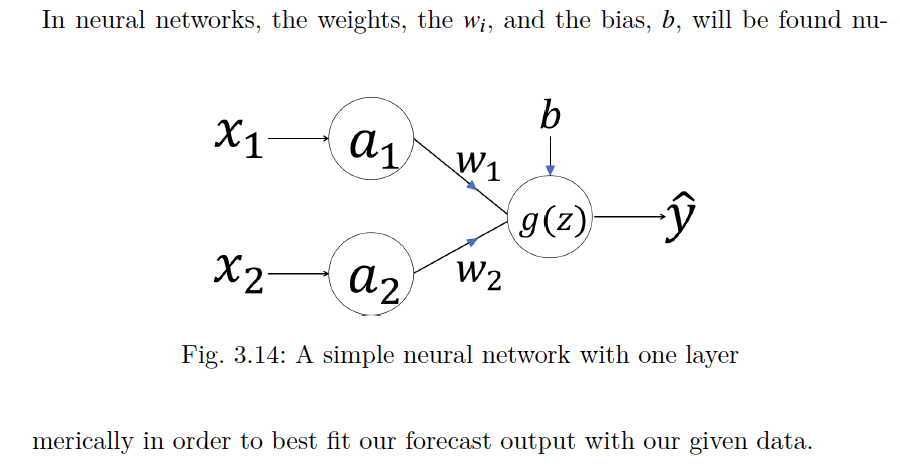

A general network may have hundreds or thousands of nodes. It demonstrates the inputs and outputs of neural networks. 

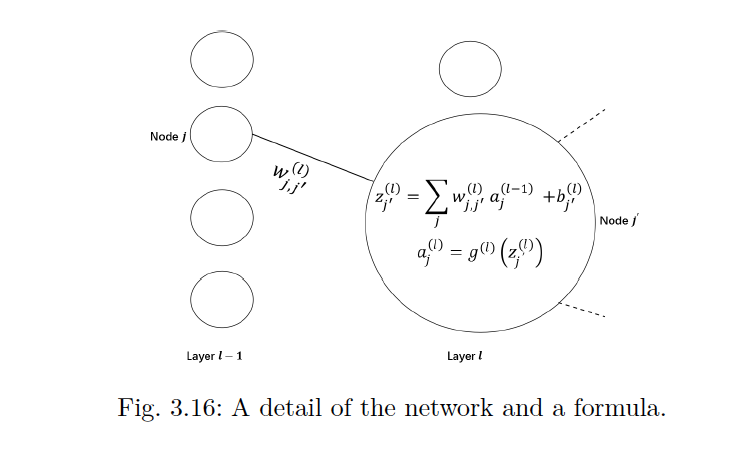

In [15]:
# Import python libraries required in this example:
import numpy as np
from scipy.special import expit as activation_function
from scipy.stats import truncnorm

# DEFINE THE NETWORK

# Generate random numbers within a truncated (bounded) 
# normal distribution:
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

# Create the ‘Nnetwork’ class and define its arguments:
# Set the number of neurons/nodes for each layer
# and initialize the weight matrices:  
class Nnetwork:

    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate 
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        """ A method to initialize the weight matrices of the neural network"""
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, 
                                        self.no_of_hidden_nodes))

    def train(self, input_vector, target_vector):
        pass # More work is needed to train the network
            
    def run(self, input_vector):
        """
        running the network with an input vector 'input_vector'. 
        'input_vector' can be tuple, list or ndarray
        """
        # Turn the input vector into a column vector:
        input_vector = np.array(input_vector, ndmin=2).T
        # activation_function() implements the expit function,
        # which is an implementation of the sigmoid function:
        input_hidden = activation_function(self.weights_in_hidden @   input_vector)
        output_vector = activation_function(self.weights_hidden_out @ input_hidden)
        return output_vector 

# RUN THE NETWORK AND GET A RESULT

# Initialize an instance of the class:  
simple_network = Nnetwork(no_of_in_nodes=2, 
                               no_of_out_nodes=2, 
                               no_of_hidden_nodes=4,
                               learning_rate=0.6)

# Run simple_network for arrays, lists and tuples with shape (2):
# and get a result:
simple_network.run([(3, 4)])

array([[0.37105694],
       [0.57873107]])

3.7.2 Activation Functions

The activation function of a node abstracts the output of the node given an input or set of inputs for a specfic purpose (i.e. classification). 

3.7.2.1 Step Function

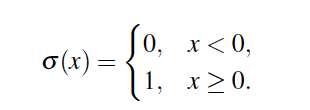

This represents a signal that switches on at a specific time and stay switched on indefinte. 

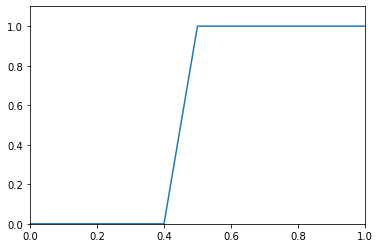

In [14]:
import matplotlib.pyplot as plt
import numpy as np


# make data
x = (0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1)
x
y = (0,0,0,0,0,1,1,1,1,1,1)
y

# plot
fig, ax = plt.subplots()

ax.plot(x, y)

ax.set(xlim=(0, 1),
       ylim=(0, 1.1))

plt.show()


3.7.2.2 ReLU Function

Positive linear/ReLU function is defined as 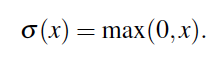

3.7.2.3 Sigmoid

Sigmoid or logistic function 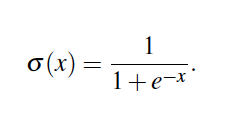

3.7.2.4 Softmax Function

The softmax function converts a vector of numbers into a vector of probabilities. 

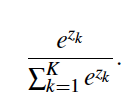

3.7.3 Cost Function 

We can use the least squares for cost function. The cost function is defined as 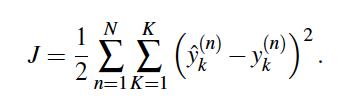

3.7.4 Backpropagation

Back-propagation is the essence of neural network training. Specfically, it is the practice of fine-tuning the weights of a neural network based on the error rate obtained in the previous iteration.

3.7.5 Backpropagation Algorithm

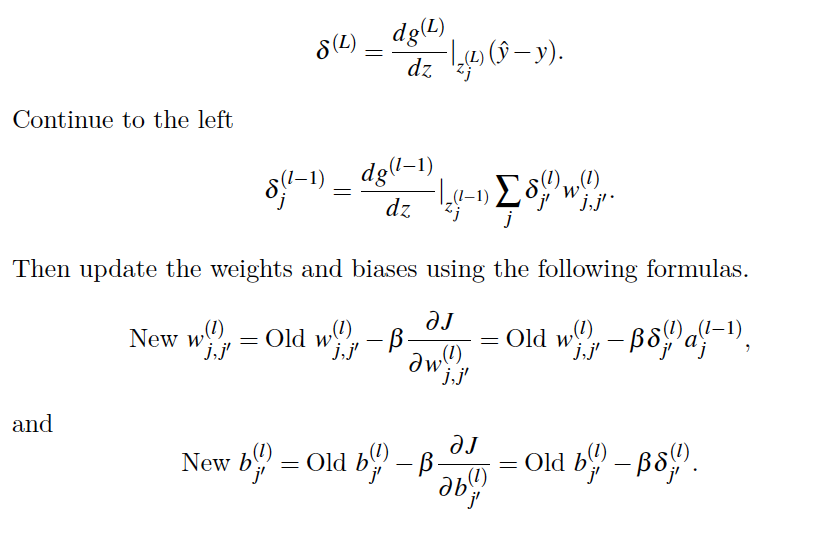